In [31]:
from wearsed.training.metric_info import combine_fold_results, metric
from wearsed.training.kfold.load_kfold import get_fold
from wearsed.dataset.Recording import Recording
from wearsed.dataset.utils import to_length
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np

In [3]:
mesa_ids = []
for fold_nr in range(4):
    _, ts = get_fold('fold-4-somnolyzer', fold_nr, seed=42, path='../wearsed/training/kfold/')
    mesa_ids += ts
len(mesa_ids)

1880

In [19]:
threshold = 0.25
y_pred, y_true, hypnogram_data, class_data = combine_fold_results('final_info', [0, 1, 2, 3], 28, drop_sep=False)
y_pred = (y_pred > threshold)*1

In [42]:
len(hypnogram_data)

61352120

In [28]:
lens = []
for a, b in zip(list(hypnogram_data[hypnogram_data == -199.0].index), [0] + list(hypnogram_data[hypnogram_data == -199.0].index)):
    lens.append(a - b)

In [ ]:
list(hypnogram_data[hypnogram_data == -199.0].index)

In [79]:
hypnograms_true = [0]
for mesa_id, l in tqdm(list(zip(mesa_ids, lens))):
    rec = Recording(mesa_id, signals_to_read=[], events_as_list=False, use_predicted_hypnogram=False)
    hypnograms_true += list(to_length(rec.hypnogram, l+60-1).values[60:])
hypnograms_true = pd.Series(hypnograms_true)

100%|██████████| 1880/1880 [00:36<00:00, 51.82it/s]


In [80]:
threshold = 0.25
y_pred, y_true, hypnogram_data, class_data = combine_fold_results('final_info', [0, 1, 2, 3], 28, drop_sep=True)
y_pred = (y_pred > threshold)*1

In [96]:
from collections import Counter
Counter(hypnograms_true.values)

Counter({np.int64(2): 21245490,
         np.int64(0): 20435340,
         np.int64(1): 8595810,
         np.int64(5): 6495870,
         np.int64(3): 4577730})

In [101]:
Counter(hypnograms_true.values)

Counter({np.int64(1): 29841300,
         np.int64(0): 20435340,
         np.int64(5): 6495870,
         np.int64(3): 4577730})

In [105]:
total = 29841300+20435340+6495870+4577730
print(f'Total: {total}')
print(f'Wake:  {20435340/total*100:.2f}%')
print(f'N1/N2: {29841300/total*100:.2f}%')
print(f'N3:    {4577730/total*100:.2f}%')
print(f'REM:   {6495870/total*100:.2f}%')

Total: 61350240
Wake:  33.31%
N1/N2: 48.64%
N3:    7.46%
REM:   10.59%


In [82]:
print(len(hypnograms_true))
print(len(hypnogram_data))

61350240
61350240


In [99]:
hypnograms_true[hypnograms_true == 2] = 1

<Axes: >

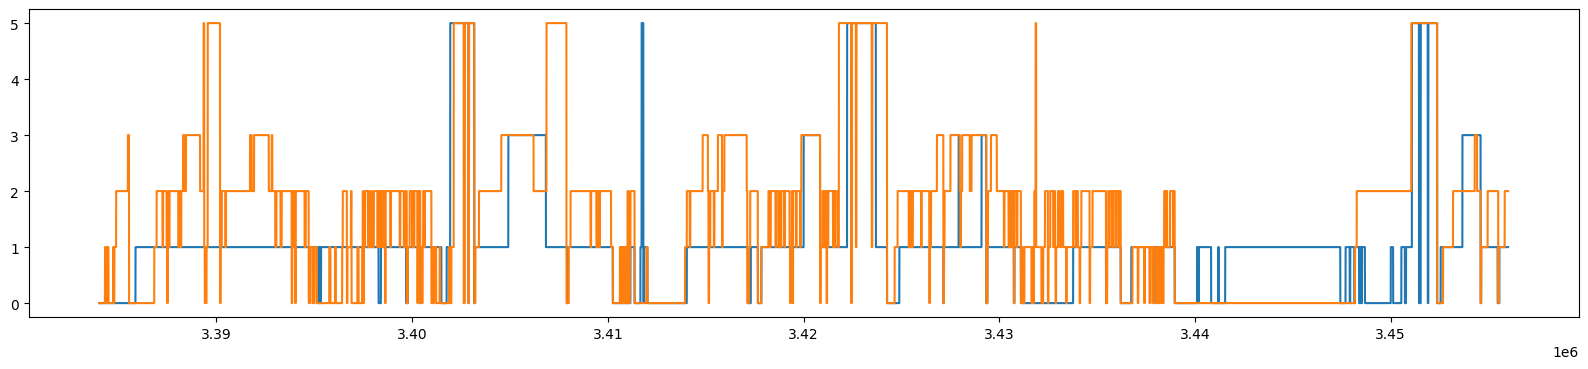

In [90]:
i = 60*60*940
h = 20
hypnogram_data[i:i+60*60*h].plot(figsize=(20, 4))
hypnograms_true[i:i+60*60*h].plot(figsize=(20, 4))

In [102]:
TP, FP, FN, info_durations_true, info_durations_pred, info_sleep_stage_found, info_sleep_stage_not_found, info_event_class_found, info_event_class_not_found = metric(y_pred, y_true, hypnograms_true, class_data, correctify=False, correctify_size=0)

total_events = info_sleep_stage_found[0]+info_sleep_stage_not_found[0]+info_sleep_stage_found[1]+info_sleep_stage_not_found[1]+info_sleep_stage_found[3]+info_sleep_stage_not_found[3]+info_sleep_stage_found[5]+info_sleep_stage_not_found[5]

total_wake = info_sleep_stage_found[0]+info_sleep_stage_not_found[0]
total_n1_n2 = info_sleep_stage_found[1]+info_sleep_stage_not_found[1]
total_n3 = info_sleep_stage_found[3]+info_sleep_stage_not_found[3]
total_rem = info_sleep_stage_found[5]+info_sleep_stage_not_found[5]

total_osa = info_event_class_found[1]+info_event_class_not_found[1]
total_msa = info_event_class_found[2]+info_event_class_not_found[2]
total_csa = info_event_class_found[3]+info_event_class_not_found[3]
total_hyp = info_event_class_found[4]+info_event_class_not_found[4]

print(f'Total Events: {total_events}')
print()
print('           | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP')
print('-----------+-------------------------------------+----------------------------------')
print(f'Total (N)  | {total_wake}        {total_n1_n2}   {total_n3}     {total_rem}   ', end='')
print(f' | {total_osa}    {total_msa}     {total_csa}   {total_hyp}')
print(f'% of all   | {total_wake/total_events*100:.1f}%     {total_n1_n2/total_events*100:.1f}%    {total_n3/total_events*100:.1f}%     {total_rem/total_events*100:.1f}%   ', end='')
print(f' | {total_osa/total_events*100:.1f}%    {total_msa/total_events*100:.1f}%     {total_csa/total_events*100:.1f}%   {total_hyp/total_events*100:.1f}%')

Total Events: 243748

           | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP
-----------+-------------------------------------+----------------------------------
Total (N)  | 3        185402   7350     50993    | 61161    4811     15240   162536
% of all   | 0.0%     76.1%    3.0%     20.9%    | 25.1%    2.0%     6.3%   66.7%


======= Correctify: False/0 =================================================================================
                                    | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP
                         -----------+-------------------------------------+----------------------------------
[ Precision | 62.0% ]    Total (N)  | 3       185402   7350     50993    | 61161    4811     15240   162536
[ Recall    | 72.2% ]    Found (N)  | 0       134010   4634     37250    | 44206    4361     12665   114662
[ F1-score  | 66.7% ]    Found (%)  | 0.0%    72.3%    63.0%    73.0%    | 72.3%    90.6%    83.1%   70.5%

======= Correctify: True/3 =================================================================================
                                    | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP
                         -----------+-------------------------------------+----------------------------------
[ Precision | 68.5% ]  

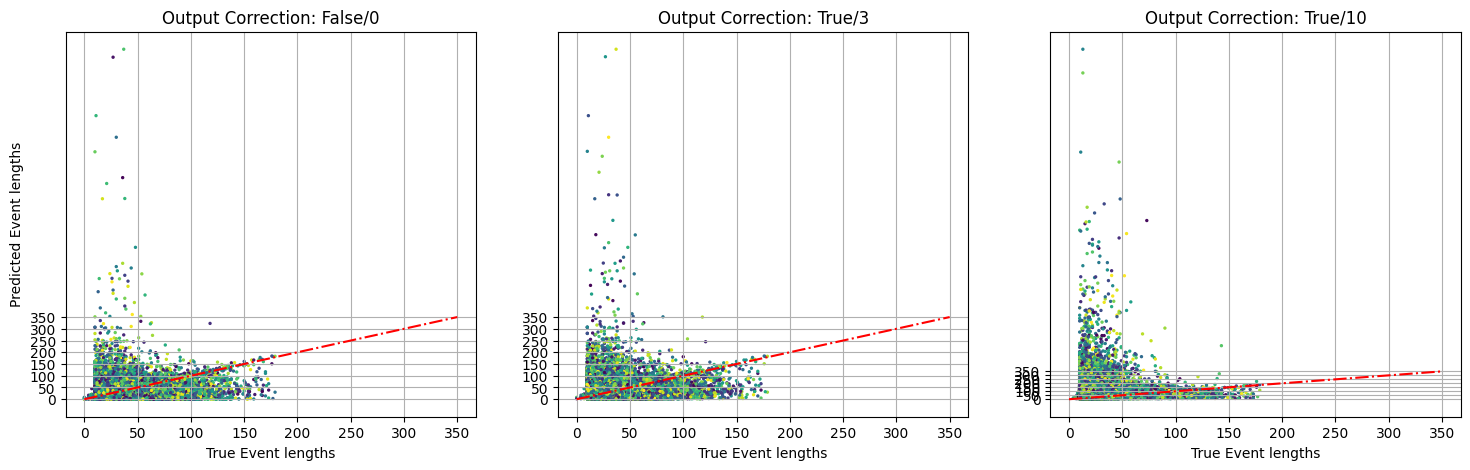

In [103]:
_, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (do_cor, cor_size) in enumerate([(False, 0), (True, 3), (True, 10)]):
    TP, FP, FN, info_durations_true, info_durations_pred, info_sleep_stage_found, info_sleep_stage_not_found, info_event_class_found, info_event_class_not_found = metric(y_pred, y_true, hypnograms_true, class_data, correctify=do_cor, correctify_size=cor_size)

    print(f'======= Correctify: {do_cor}/{cor_size} =================================================================================')

    precision = TP / (TP + FP) if TP > 0 else 0
    recall = TP / (TP + FN) if TP > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall)
    print(' '*25 + '           | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP')
    print(' '*25 + '-----------+-------------------------------------+----------------------------------')
    print(f'[ Precision | {precision*100:.1f}% ]', end=' '*4)
    print(f'Total (N)  | {info_sleep_stage_found[0]+info_sleep_stage_not_found[0]}       {info_sleep_stage_found[1]+info_sleep_stage_not_found[1]}   {info_sleep_stage_found[3]+info_sleep_stage_not_found[3]}     {info_sleep_stage_found[5]+info_sleep_stage_not_found[5]}   ', end='')
    print(f' | {info_event_class_found[1]+info_event_class_not_found[1]}    {info_event_class_found[2]+info_event_class_not_found[2]}     {info_event_class_found[3]+info_event_class_not_found[3]}   {info_event_class_found[4]+info_event_class_not_found[4]}')
    print(f'[ Recall    | {recall*100:.1f}% ]', end=' '*4)
    print(f'Found (N)  | {info_sleep_stage_found[0]}       {info_sleep_stage_found[1]} {' ' if cor_size==10 else ''}  {info_sleep_stage_found[3]}     {info_sleep_stage_found[5]}   ', end='')
    print(f' | {info_event_class_found[1]}    {info_event_class_found[2]}     {info_event_class_found[3]}   {info_event_class_found[4]}')
    print(f'[ F1-score  | {f1*100:.1f}% ]', end=' '*4)
    print(f'Found (%)  | {info_sleep_stage_found[0]/(info_sleep_stage_found[0]+info_sleep_stage_not_found[0])*100:.1f}%    {info_sleep_stage_found[1]/(info_sleep_stage_found[1]+info_sleep_stage_not_found[1])*100:.1f}%    {info_sleep_stage_found[3]/(info_sleep_stage_found[3]+info_sleep_stage_not_found[3])*100:.1f}%    {info_sleep_stage_found[5]/(info_sleep_stage_found[5]+info_sleep_stage_not_found[5])*100:.1f}%   ', end='')
    print(f' | {info_event_class_found[1]/(info_event_class_found[1]+info_event_class_not_found[1])*100:.1f}%    {info_event_class_found[2]/(info_event_class_found[2]+info_event_class_not_found[2])*100:.1f}%    {info_event_class_found[3]/(info_event_class_found[3]+info_event_class_not_found[3])*100:.1f}%   {info_event_class_found[4]/(info_event_class_found[4]+info_event_class_not_found[4])*100:.1f}%')
    print()

    axs[i].scatter(info_durations_true, info_durations_pred, s=2, c=np.random.rand(len(info_durations_true), 1))
    axs[i].plot([0, 350], [0, 350], 'r-.')
    axs[i].set_xlabel('True Event lengths')
    if i == 0:
        axs[i].set_ylabel('Predicted Event lengths')
    axs[i].set_title(f'Output Correction: {do_cor}/{cor_size}')
    axs[i].set_xticks([50*i for i in range(8)])
    axs[i].set_yticks([50*i for i in range(8)])
    axs[i].grid()

plt.show()

In [5]:
print(len(info_durations_true))
print(len([l for l in info_durations_true if l < 50]))
print(f'{len([l for l in info_durations_true if l < 50]) / len(info_durations_true)*100:.1f}%')

134446
123645
92.0%


======= Correctify: False/0 =================================================================================
                                    | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP
                         -----------+-------------------------------------+----------------------------------
[ Precision | 71.6% ]    Total (N)  | 20812    166859   7575     48502    | 61161    4811     15240   162536
[ Recall    | 63.8% ]    Found (N)  | 7930     109721   4223     33726    | 41948    4332     11883   97437
[ F1-score  | 67.5% ]    Found (%)  | 38.1%    65.8%    55.7%    69.5%    | 68.6%    90.0%    78.0%   59.9%

======= Correctify: True/3 =================================================================================
                                    | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP
                         -----------+-------------------------------------+----------------------------------
[ Precision | 76.3% ]

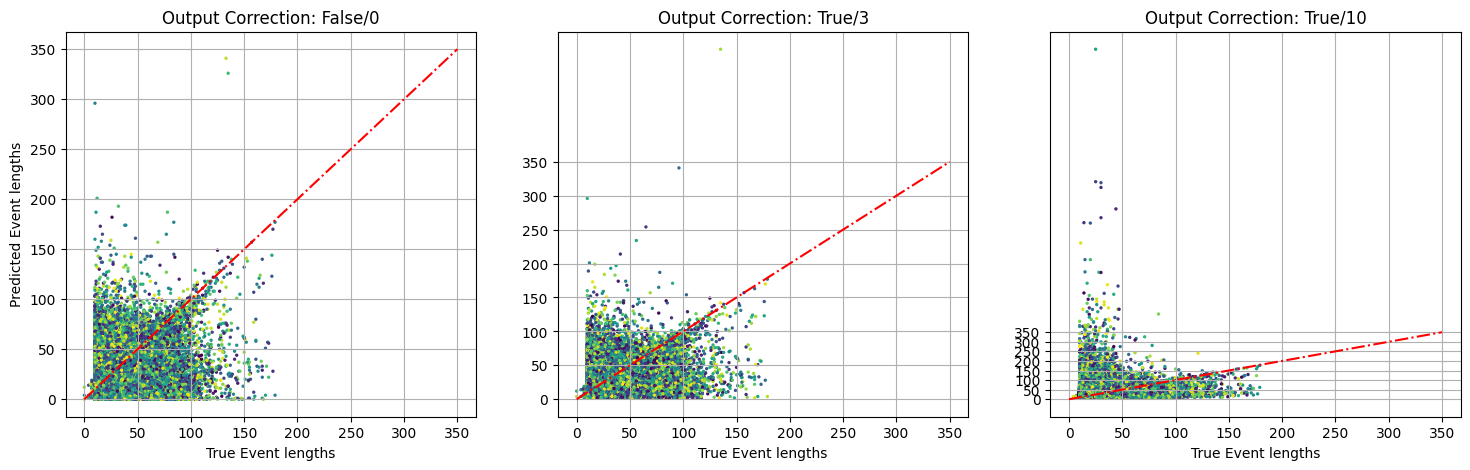

In [ ]:
_, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, (do_cor, cor_size) in enumerate([(False, 0), (True, 3), (True, 10)]):
    TP, FP, FN, info_durations_true, info_durations_pred, info_sleep_stage_found, info_sleep_stage_not_found, info_event_class_found, info_event_class_not_found = metric(y_pred, y_true, hypnogram_data, class_data, correctify=do_cor, correctify_size=cor_size)

    print(f'======= Correctify: {do_cor}/{cor_size} =================================================================================')

    precision = TP / (TP + FP) if TP > 0 else 0
    recall = TP / (TP + FN) if TP > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall)
    print(' '*25 + '           | Wake     N1/N2    N3       REM      | OSA      MSA      CSA      HYP')
    print(' '*25 + '-----------+-------------------------------------+----------------------------------')
    print(f'[ Precision | {precision*100:.1f}% ]', end=' '*4)
    print(f'Total (N)  | {info_sleep_stage_found[0]+info_sleep_stage_not_found[0]}    {info_sleep_stage_found[1]+info_sleep_stage_not_found[1]}   {info_sleep_stage_found[3]+info_sleep_stage_not_found[3]}     {info_sleep_stage_found[5]+info_sleep_stage_not_found[5]}   ', end='')
    print(f' | {info_event_class_found[1]+info_event_class_not_found[1]}    {info_event_class_found[2]+info_event_class_not_found[2]}     {info_event_class_found[3]+info_event_class_not_found[3]}   {info_event_class_found[4]+info_event_class_not_found[4]}')
    print(f'[ Recall    | {recall*100:.1f}% ]', end=' '*4)
    print(f'Found (N)  | {info_sleep_stage_found[0]}     {info_sleep_stage_found[1]} {' ' if cor_size==10 else ''}  {info_sleep_stage_found[3]}     {info_sleep_stage_found[5]}   ', end='')
    print(f' | {info_event_class_found[1]}    {info_event_class_found[2]}     {info_event_class_found[3]}   {info_event_class_found[4]}')
    print(f'[ F1-score  | {f1*100:.1f}% ]', end=' '*4)
    print(f'Found (%)  | {info_sleep_stage_found[0]/(info_sleep_stage_found[0]+info_sleep_stage_not_found[0])*100:.1f}%    {info_sleep_stage_found[1]/(info_sleep_stage_found[1]+info_sleep_stage_not_found[1])*100:.1f}%    {info_sleep_stage_found[3]/(info_sleep_stage_found[3]+info_sleep_stage_not_found[3])*100:.1f}%    {info_sleep_stage_found[5]/(info_sleep_stage_found[5]+info_sleep_stage_not_found[5])*100:.1f}%   ', end='')
    print(f' | {info_event_class_found[1]/(info_event_class_found[1]+info_event_class_not_found[1])*100:.1f}%    {info_event_class_found[2]/(info_event_class_found[2]+info_event_class_not_found[2])*100:.1f}%    {info_event_class_found[3]/(info_event_class_found[3]+info_event_class_not_found[3])*100:.1f}%   {info_event_class_found[4]/(info_event_class_found[4]+info_event_class_not_found[4])*100:.1f}%')
    print()

    axs[i].scatter(info_durations_true, info_durations_pred, s=2, c=np.random.rand(len(info_durations_true), 1))
    axs[i].plot([0, 350], [0, 350], 'r-.', label='Identity line')
    axs[i].set_xlabel('True Event lengths')
    if i == 0:
        axs[i].set_ylabel('Predicted Event lengths')
    axs[i].set_title(f'Output Correction: {do_cor}/{cor_size}')
    axs[i].set_xticks([50*i for i in range(8)])
    axs[i].set_yticks([50*i for i in range(8)])
    axs[i].grid()

plt.show()